In [70]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified by Ester Pantaleo
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

def make_meshgrid(X, h=.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

0
Gaussian
Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Linear SVM
C=0.025
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Gaussian kernel
SVM C=1
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian kernel
SVM C=1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Gaussian kernel
SVM C=1e5
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.57      0.89      0.70         9

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20

Neural Net
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg 

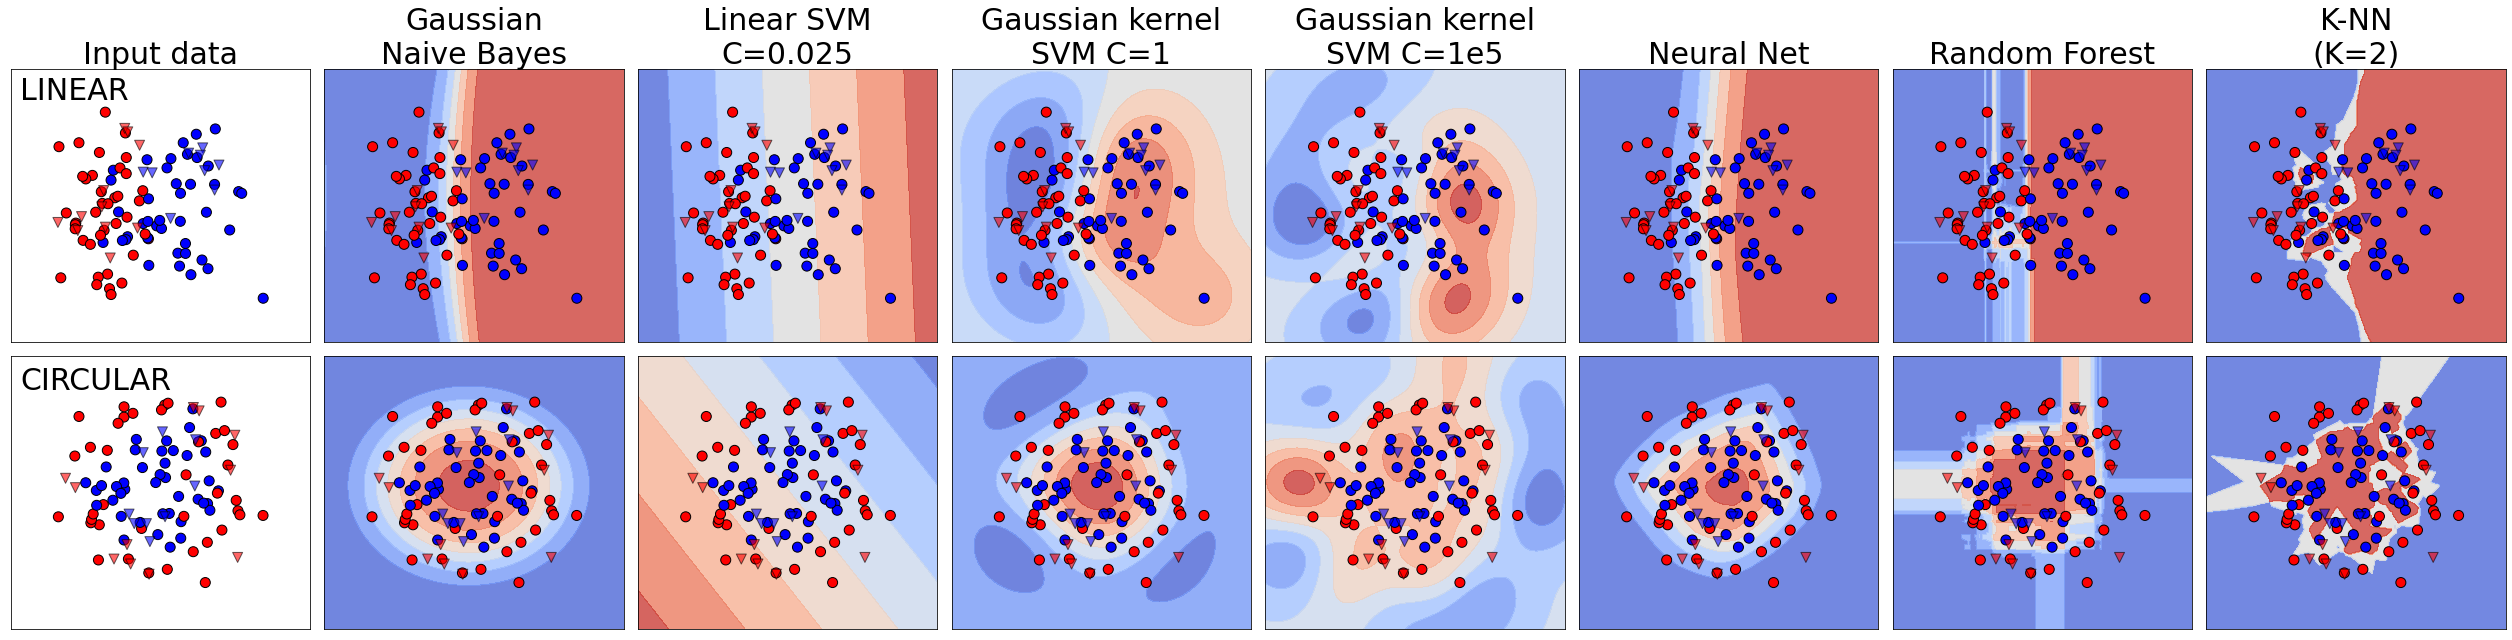

In [329]:
h = 0.02  # step size in the mesh

names = [#"Bernoulli\nNaive Bayes" , 
         "Gaussian\nNaive Bayes",
         "Linear SVM\nC=0.025",
         #"Linear SVM C=1e-6", "Linear SVM C=1000", 
         "Gaussian kernel\nSVM C=1", 
         "Gaussian kernel\nSVM C=1e5", 
         "Neural Net",
         "Random Forest",
         #"K-NN\n(K=1)", 
        "K-NN\n(K=2)"
]

classifiers = [
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    #SVC(kernel="linear", C=0.000001),
    #SVC(kernel="linear", C=1000),
    SVC(kernel="rbf", C=1),
    SVC(kernel="rbf", C=100000),
    MLPClassifier(alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=2),
    #KNeighborsClassifier(1), 
    KNeighborsClassifier(2)
]

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,
    random_state=8, n_clusters_per_class=1)#, class_sep=0.9)  #25, 0.8
rng = np.random.RandomState(8)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    linearly_separable,
    make_circles(noise=0.2, factor=0.5, random_state=13) 
]

figure = plt.figure(figsize=(35, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)
    xx, yy = make_meshgrid(X, h=.02)
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=30)
        ax.text(xx.min() + .2, yy.max()-0.7, "LINEAR", size=30, horizontalalignment='left')
    if ds_cnt == 1:
        ax.text(xx.min() + .2, yy.max()-0.7, "CIRCULAR", size=30, horizontalalignment='left')
    print(ds_cnt)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k', s=100,marker='v')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        #ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', s=100)
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6, s=100,marker='v')
        #ax.contour(xx, yy, Z, [0], colors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=30)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        i += 1
plt.tight_layout()
#plt.show()
plt.savefig("decision_boundary.pdf")
#large C can overfit with SVM kernel="rbf"

<ipython-input-325-a0a0c2d5a8ba>:56: UserWarning: The following kwargs were not used by contour: 'label'
  contour = ax.contour(xx, yy, Z, [0], colors='k', label = "Boundary")


1
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.54      0.78      0.64         9

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weighted avg       0.64      0.60      0.59        20



<ipython-input-325-a0a0c2d5a8ba>:56: UserWarning: The following kwargs were not used by contour: 'label'
  contour = ax.contour(xx, yy, Z, [0], colors='k', label = "Boundary")
<ipython-input-325-a0a0c2d5a8ba>:56: UserWarning: No contour levels were found within the data range.
  contour = ax.contour(xx, yy, Z, [0], colors='k', label = "Boundary")
<ipython-input-325-a0a0c2d5a8ba>:56: UserWarning: The following kwargs were not used by contour: 'label'
  contour = ax.contour(xx, yy, Z, [0], colors='k', label = "Boundary")


2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

3
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



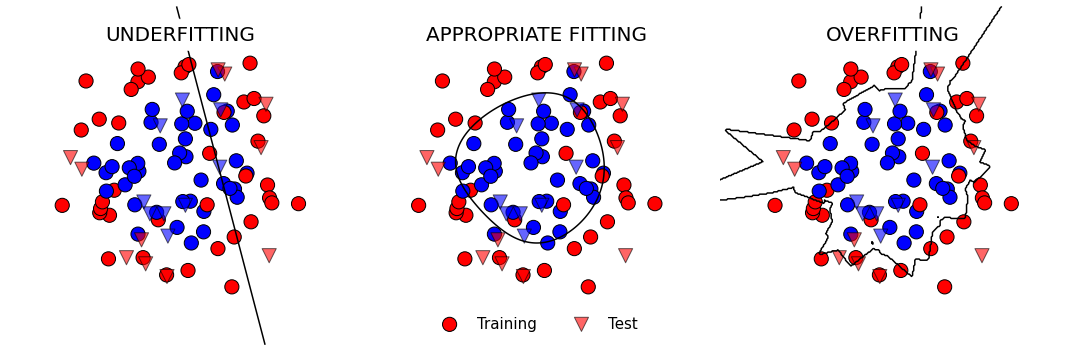

In [325]:
from sklearn.metrics import classification_report

h = 0.02  # step size in the mesh

names = [
    "UNDERFITTING",
    "APPROPRIATE FITTING",
    "OVERFITTING"
]

classifiers = [    
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    KNeighborsClassifier(2)
]

datasets = [make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=13)] #15

figure = plt.figure(figsize=(15, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)
    xx, yy = make_meshgrid(X, h=.02)
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers), i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        # Put the result into a color plot
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', s=200, label = "Training")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6, s=200, marker='v', label = "Test")
        contour = ax.contour(xx, yy, Z, [0], colors='k', label = "Boundary")

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='white')
        ax.text(.5, .9, name,
            horizontalalignment='center',
            transform=ax.transAxes, fontsize=20,  bbox=props)
        
        print(i)
        
        if i==2:
            leg = ax.legend();
            ax.legend(frameon=False, loc='lower center', prop={'size': 15}, ncol=3)
        i += 1
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        plt.box(False)

plt.tight_layout()
#plt.show()

plt.savefig("over_under_fitting.pdf", bbox_inches='tight')